In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D

(512, 512, 3)


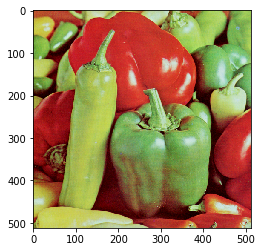

In [65]:
img1 = mpimg.imread('veggies.tiff')
imgplot_1 = plt.imshow(img1)

No.of Data Points: 262144


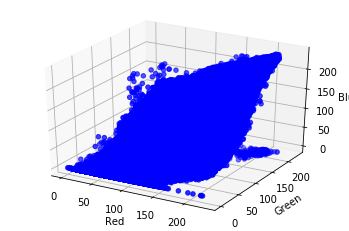

In [3]:
#Visualizing the pixels in RGB space(3D space)
shape = np.shape(img1)
#Number of Data Points
N = shape[0]*shape[1]
print('No.of Data Points:',N)
#Each Data Point has 3 features which can uniuely represent each color.
r,b,g = img1[:,:,0],img1[:,:,1],img1[:,:,2]
#Flattening the 2D array into a 1D array
r = r.flatten()
b = b.flatten()
g = g.flatten()
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d") # 3D plot with scalar values in each axis
axis.scatter(r, g, b, c="blue", marker="o")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()
#Zipping r,g,b values into a single array and storing each data point as a tuple
data = list(zip(r,b,g))

In [4]:
#Initial Parameters
K = 4
#Initialization
r_nk = np.zeros((N,K))
#Randomly initializing centroids
from random import seed
from random import sample
seed(1)
#prepare a sequence of all the indices
indices = list(np.arange(N))
#select a subset without replacement
centroid = sample(indices, K)
for k in range(K):
    centroid[k] = data[centroid[k]]

In [5]:
#This definition sets the the values in r_nk matrix depending upon the distance between the corresponding pixel and centroids
def set_coefs(data,N,K,r_nk,centroid):
    r_nk = np.zeros((N,K))
    for i in range(N):
        m = None
        m_index = None
        for j in range(K):
            temp = np.linalg.norm(np.array(data[i])-np.array(centroid[j]))
            if(m == None or temp < m):
                m = temp
                m_index = j
        r_nk[i][m_index] = 1
    return r_nk

In [6]:
#Updating the centroids
def set_centroids(data,N,K,r_nk,centroid):
    for i in range(K):
        num = (0,0,0)
        den = 0
        for j in range(N):
            if(r_nk[j][i] == 1):
                num = (num[0] + data[j][0], num[1] + data[j][1], num[2] + data[j][2])
                den += 1
        centroid[i] = (num[0]/den,num[1]/den,num[2]/den)
    return centroid

In [7]:
#K-Means clustering Algorithm
def clustering(data,N,K,r_nk,centroid):
    iters = 20
    error = []
    for it in range(iters):
        prev = centroid[:]
        r_nk = set_coefs(data,N,K,r_nk,centroid)
        centroid = set_centroids(data,N,K,r_nk,centroid)
        err = 0
        for k in range(K):
            err += np.linalg.norm(np.array(prev[k])-np.array(centroid[k]))
        error.append(err)
        if(err <= 0.1):
            break
    return r_nk,centroid,error    

In [8]:
#Printing the errors
#Error is considered as the summation of norm of previous centroids and current centroid.
f_rnk,f_centroid,errors = clustering(data,N,K,r_nk,centroid)
print(errors)

[391.0195932657326, 137.41088486517253, 61.38031106289646, 50.61658295196627, 21.072476832670844, 11.114425259962644, 6.334955880466707, 3.7327752249706636, 2.159015977809359, 1.2192019532665679, 0.8059878871480328, 0.5186092111211603, 0.31789055262400573, 0.18366501588193568, 0.11559589270735782, 0.08811759612797401]


In [18]:
#Printing the K Clusters at convergence
print(f_rnk)

[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


In [10]:
#Printing the Final Position of Centroids
print(centroid)

[(124.78200045085065, 153.7154336785435, 72.84318353599512), (184.63129396151294, 48.91373589913736, 40.78396814863968), (178.4649925278286, 200.54264724367658, 116.70308244528555), (79.80232265848876, 16.567291739982906, 13.050223719270022)]


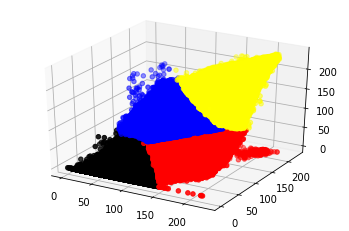

In [19]:
#Visualising the Clusters in 3D space
r_1 = []
g_1 = []
b_1 = []
r_2 = []
g_2 = []
b_2 = []
r_3 = []
g_3 = []
b_3 = []
r_4 = []
g_4 = []
b_4 = []
for n in range(N):
    if(f_rnk[n][0] == 1):
        r_1.append(r[n])
        g_1.append(g[n])
        b_1.append(b[n])
    elif(f_rnk[n][1] == 1):
        r_2.append(r[n])
        g_2.append(g[n])
        b_2.append(b[n])
    elif(f_rnk[n][2] == 1):
        r_3.append(r[n])
        g_3.append(g[n])
        b_3.append(b[n])
    elif(f_rnk[n][3] == 1):
        r_4.append(r[n])
        g_4.append(g[n])
        b_4.append(b[n])
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d") # 3D plot with scalar values in each axis
axis.scatter(r_1, g_1, b_1, c="blue", marker="o")
axis.scatter(r_2, g_2, b_2, c="red", marker="o")
axis.scatter(r_3, g_3, b_3, c="yellow", marker="o")
axis.scatter(r_4, g_4, b_4, c="black", marker="o")
plt.show()

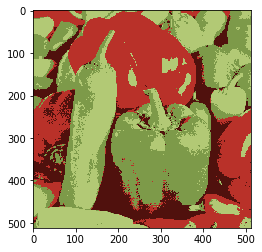

In [68]:
#Visualising the Image after Clustering
pred_img = np.zeros((int(np.sqrt(N)),int(np.sqrt(N)),3))
r,c,d = np.shape(pred_img)
for i in range(r):
    for j in range(c):
        #print(i)
        #print(j)
        if(f_rnk[(512*i)+j][0] == 1):
            pred_img[i][j] = list([int(round(x)) if isinstance(x, float) else x for x in centroid[0]])
        elif(f_rnk[(512*i)+j][1] == 1):
            pred_img[i][j] = list([int(round(x)) if isinstance(x, float) else x for x in centroid[1]])
        elif(f_rnk[(512*i)+j][2] == 1):
            pred_img[i][j] = list([int(round(x)) if isinstance(x, float) else x for x in centroid[2]])
        elif(f_rnk[(512*i)+j][3] == 1):
            pred_img[i][j] = list([int(round(x)) if isinstance(x, float) else x for x in centroid[3]])
pred_img = pred_img.astype(int)
imgplot_2 = plt.imshow(pred_img)

In [12]:
#Principal Component Analysis
#Considering the same Image for datapoints
#Previously the datapoints were stored as a list of tuples
#Now we have to store them as a list of lists to be able to perform matrix operations
X_T = list(map(list, data))
X_T = np.array(X_T)
X = X_T.transpose()
from statistics import mean

In [13]:
#Making the mean of each row in X equal to zero
rows,cols = np.shape(X)
Z = np.zeros((rows,cols))
for i in range(rows):
    count = 0
    sum = 0
    for j in range(cols):
        sum += X[i][j]
        count += 1
    mean = sum/count
    #print(count)
    #print(mean)
    for j in range(cols):
        Z[i][j] = X[i][j] - mean

In [14]:
#Calculating the transpose of Z
Z_T = Z.transpose()
#Calculating covariance matrix
C_ZZ =  (1/N-1)*np.matmul(Z,Z_T)
#Using Numpy functions to calculate Eigen Vectors and then sorting the 
#Eigen Vectors in the decreasing order of corresponding Eigen Values.(As per Tutorial given in classroom)
eig_values, eig_vectors = np.linalg.eig(C_ZZ)
idx = np.argsort(eig_values, axis=0)[::-1]
sorted_eig_vectors = eig_vectors[:, idx]
P = sorted_eig_vectors.transpose()
Y = np.matmul(P,Z)
#Y is the decorrelated matrix
C_YY = np.matmul(np.matmul(P,C_ZZ),P.transpose())
#Clearly C_YY has values tending to zero apart from the diagonal, this implies that features in Y are uncorrelated
print(C_YY)
#PCA is agnostic to the source of the data and this is a weakness for PCA.

[[-1.08981189e+08  1.87517478e-08 -1.65000295e-07]
 [ 1.53847001e-08 -4.76781149e+08 -5.80224103e-08]
 [-1.65678484e-07 -1.35786938e-07 -1.93968009e+09]]


In [29]:
#Maximum Likelihood Estimation
#Generating an array of random integers
from numpy.random import randint
# seed random number generator
seed(23)
# generate some integers
N_values = 10000
#Choosing random integers between 0 and 6(excluded)
values = randint(0,6, N_values)

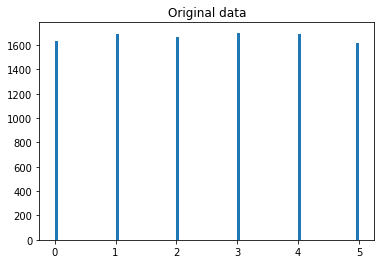

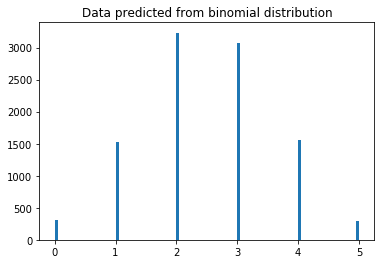

In [30]:
#Binomial distribution
#unknown parameter is p
p = np.sum(values)/(5*N_values) #We are treating each binomial trial as 5 independent bernoulli trials
pred_binomial = np.random.binomial(5,p,N_values)
plt.hist(values,bins =100)
plt.title('Original data')
plt.show()
plt.hist(pred_binomial,bins = 100) 
plt.title('Data predicted from binomial distribution')
plt.show()

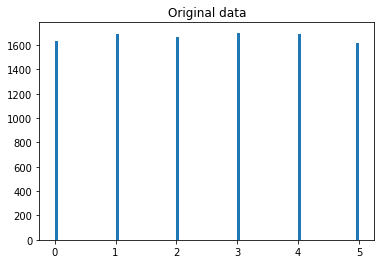

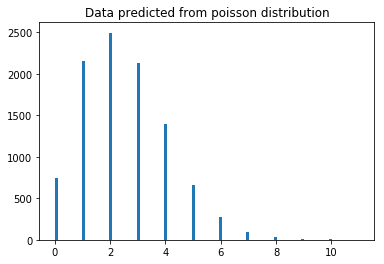

In [31]:
#Poisson distribution
#unknown parameter is lambda
l = np.sum(values)/(N_values) 
pred_poisson = np.random.poisson(l,N_values)
plt.hist(values,bins =100)
plt.title('Original data')
plt.show()
plt.hist(pred_poisson,bins = 100) 
plt.title('Data predicted from poisson distribution')
plt.show()

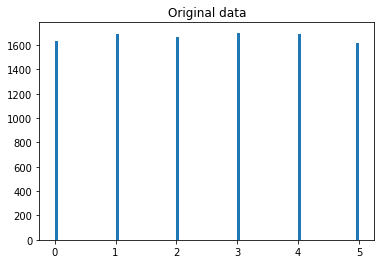

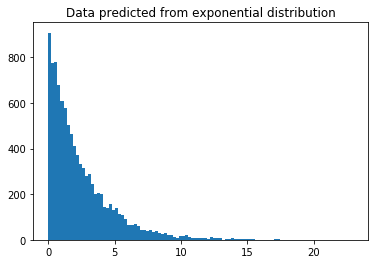

In [32]:
#Exponential distribution
#unknown parameter is theta
theta = np.sum(values)/(N_values) 
pred_exp = np.random.exponential(theta,N_values)
plt.hist(values,bins =100)
plt.title('Original data')
plt.show()
plt.hist(pred_exp,bins = 100) 
plt.title('Data predicted from exponential distribution')
plt.show()

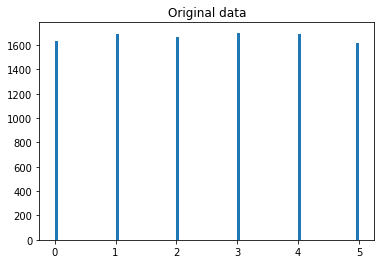

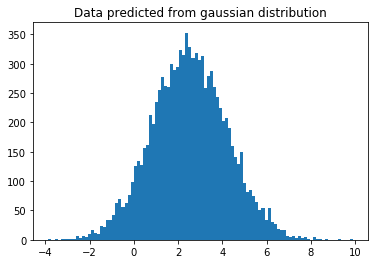

In [33]:
#Gaussian distribution
#unknown parameters are mean and variance
mean = np.sum(values)/(N_values)
var = np.sum((values - mean)**2)/N_values
sd = var**0.5
pred_gauss = np.random.normal(mean,sd,N_values)
plt.hist(values,bins =100)
plt.title('Original data')
plt.show()
plt.hist(pred_gauss,bins = 100) 
plt.title('Data predicted from gaussian distribution')
plt.show()

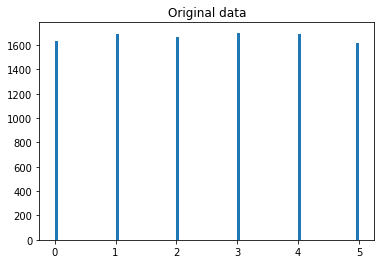

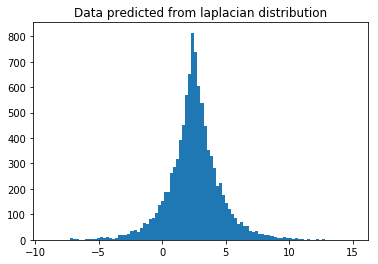

In [34]:
#Laplace distribution
#unknown parameters are mean and beta
mean = np.sum(values)/(N_values)
beta = np.sum((np.abs(values - mean)))/N_values
pred_lap = np.random.laplace(mean,beta,N_values)
plt.hist(values,bins =100)
plt.title('Original data')
plt.show()
plt.hist(pred_lap,bins = 100) 
plt.title('Data predicted from laplacian distribution')
plt.show()